# SI projekt

## Preparation

### Imports:

In [1]:
import keras
import tensorflow as tf
import numpy as np
import visualkeras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model
from keras.optimizers import SGD

### Dataset:

In [2]:
from keras.datasets import fashion_mnist

# Load fashion_mnist data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#arrange datasets
x_full_test = x_test[6000:10000]
x_test = x_test[:6000]

y_full_test = y_test[6000:10000]
y_test = y_test[:6000]

y_train_base = y_train
x_full_test = x_full_test.reshape(x_full_test.shape[0], 28, 28, 1)
x_train_base = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Print the lengths of the resulting arrays
print("Shapes:")
print('Train x base: ', x_train_base.shape)
print('Train y base: ', y_train_base.shape)
print('Test x: ', x_test.shape)
print('Test y: ', y_test.shape)
print('Full test x: ', x_full_test.shape)
print('Full test y: ', y_full_test.shape)
print()
num_classes = 10
y_train_base = keras.utils.to_categorical(y_train_base, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_full_test = keras.utils.to_categorical(y_full_test, num_classes)

print("Example target:")
print(y_train_base[0])
print()

x_full_test = x_full_test.astype('float32')
x_train_base = x_train_base.astype('float32')
x_test = x_test.astype('float32')

#normalize data
x_full_test /= 255
x_train_base /= 255
x_test /= 255



# Split data for 3 models
x_train = np.split(x_train_base, 3)
y_train = np.split(y_train_base, 3)

for i in range(3):
    print('Train x of ', i, ": ", x_train[i].shape)
    print('Train y of ', i, ": ", y_train[i].shape)

Shapes:
Train x base:  (60000, 28, 28, 1)
Train y base:  (60000,)
Test x:  (6000, 28, 28, 1)
Test y:  (6000,)
Full test x:  (4000, 28, 28, 1)
Full test y:  (4000,)

Example target:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Train x of  0 :  (20000, 28, 28, 1)
Train y of  0 :  (20000, 10)
Train x of  1 :  (20000, 28, 28, 1)
Train y of  1 :  (20000, 10)
Train x of  2 :  (20000, 28, 28, 1)
Train y of  2 :  (20000, 10)


## CNN model training:

### Set model number:

In [3]:
model_num = 0

### Prepare validation set

In [4]:
x_tr = x_train[model_num][:18000]  # first 21000 elements
x_va = x_train[model_num][18000:]
y_tr = y_train[model_num][:18000]  # first 21000 elements
y_va = y_train[model_num][18000:]

In [5]:
cnn_model = Sequential()
cnn_model.add(Conv2D(6, (3,3), padding='same', input_shape=(28,28, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(22, (6, 6), strides = (1, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(30))
cnn_model.add(Dense(10))
cnn_model.add(Activation('softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 22)          4774      
                                                                 
 activation_1 (Activation)   (None, 9, 9, 22)          0         
                                                        

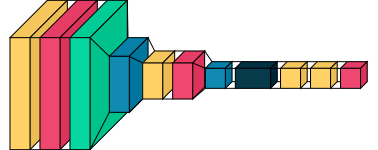

In [6]:
visualkeras.layered_view(cnn_model)

In [7]:
batch_size = 300
epochs = 400

In [8]:
cnn_model.compile(SGD(learning_rate = .005), loss='categorical_crossentropy', metrics=['accuracy'])
trained_cnn = cnn_model.fit(x_tr,
                            y_tr,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_va, y_va),
                            shuffle=True,
                            verbose=1)

Epoch 1/400
60/60 [==============================] - 4s 14ms/step - loss: 2.2626 - accuracy: 0.2501 - val_loss: 2.2349 - val_accuracy: 0.2795
Epoch 2/400
60/60 [==============================] - 1s 9ms/step - loss: 2.1751 - accuracy: 0.3301 - val_loss: 2.1380 - val_accuracy: 0.3385
Epoch 3/400
60/60 [==============================] - 1s 9ms/step - loss: 2.0283 - accuracy: 0.3737 - val_loss: 1.9552 - val_accuracy: 0.4055
Epoch 4/400
60/60 [==============================] - 1s 10ms/step - loss: 1.7716 - accuracy: 0.4485 - val_loss: 1.6587 - val_accuracy: 0.4990
Epoch 5/400
60/60 [==============================] - 1s 9ms/step - loss: 1.4360 - accuracy: 0.5427 - val_loss: 1.3320 - val_accuracy: 0.5835
Epoch 6/400
60/60 [==============================] - 1s 9ms/step - loss: 1.1564 - accuracy: 0.6278 - val_loss: 1.1108 - val_accuracy: 0.6480
Epoch 7/400
60/60 [==============================] - 1s 9ms/step - loss: 0.9979 - accuracy: 0.6684 - val_loss: 0.9889 - val_accuracy: 0.6680
Epoch 8/400

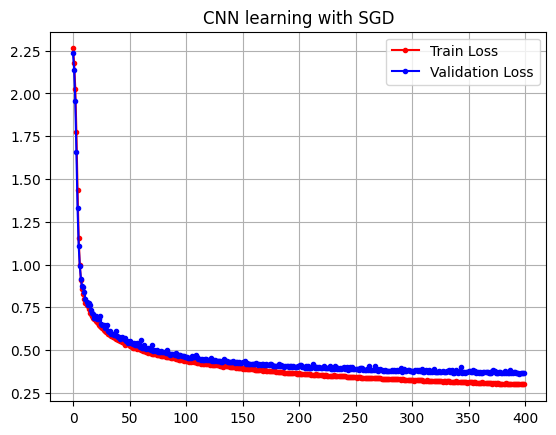

In [9]:
plt.plot(trained_cnn.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(trained_cnn.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("CNN learning with SGD")
plt.legend()
plt.grid()

In [10]:
score = cnn_model.evaluate(x_test, y_test)
print('Model Loss: ', score[0])
print('Model accuracy: ', score[1])

188/188 [==============================] - 1s 6ms/step - loss: 0.3943 - accuracy: 0.8653
Model Loss:  0.3943006694316864
Model accuracy:  0.8653333187103271


## Save model

In [11]:
keras.models.save_model(cnn_model , 'cnn_model_' + str(model_num) + '.h5')

# Model examination:

In [ ]:
#tutaj dorobić jakieś sprawdzanie modeli (heatmap, wykresy, itd)

# Model for stacking:

## Prepare predictions for training:

In [3]:
model0 = keras.models.load_model('cnn_model_0.h5')
model1 = keras.models.load_model('cnn_model_1.h5')
model2 = keras.models.load_model('cnn_model_2.h5')
predictions0 = model0.predict(x_test)
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions = np.stack([predictions0, predictions1, predictions2], axis=1)
print(predictions0[0])
print(predictions1[0])
print(predictions2[0])
print()
predictions = predictions.reshape(predictions.shape[0], 3, 10, 1)
print(predictions.shape)

188/188 [==============================] - 1s 3ms/step
[2.0757598e-06 7.0889527e-08 4.4960975e-06 2.5591155e-06 1.0214155e-06
 1.1202197e-02 1.6831625e-06 2.0235220e-02 3.6411865e-03 9.6490955e-01]
[4.9173746e-08 1.3560902e-10 1.1438058e-07 1.0125555e-08 9.4925632e-08
 1.7241171e-02 4.2764248e-07 2.4067640e-02 3.9289976e-03 9.5476162e-01]
[7.43379815e-07 1.56728623e-11 2.16248509e-06 2.86257574e-07
 1.19891626e-08 1.21433670e-02 2.12031809e-05 7.71062672e-02
 2.26002233e-03 9.08465922e-01]

(6000, 3, 10, 1)


### Predictions for test:

In [4]:
predictions0 = model0.predict(x_full_test)
predictions1 = model1.predict(x_full_test)
predictions2 = model2.predict(x_full_test)
predictions_test = np.stack([predictions0, predictions1, predictions2], axis=1)
print(predictions0[10])
print(predictions1[10])
print(predictions2[10])
print()
predictions_test = predictions_test.reshape(predictions_test.shape[0], 3, 10, 1)
print(predictions_test.shape)

125/125 [==============================] - 0s 3ms/step
[1.0171569e-04 1.7189839e-08 1.6166065e-06 4.0944360e-07 3.1356644e-06
 9.9562538e-01 3.4114055e-05 1.7065514e-03 6.3662825e-04 1.8904264e-03]
[7.6329208e-08 3.4007606e-11 4.1872845e-08 3.7701740e-09 7.3766628e-08
 9.9576902e-01 7.7431466e-08 2.9953972e-03 2.8249918e-04 9.5275627e-04]
[5.1737803e-08 1.6976892e-11 8.3102174e-09 1.2289485e-08 7.3942253e-08
 9.9761826e-01 5.4727923e-07 3.3526003e-04 2.7515491e-05 2.0181234e-03]

(4000, 3, 10, 1)


In [5]:
stacking_model = Sequential([
    Conv2D(10, (1, 3), input_shape=(3, 10, 1), padding="same", activation='relu'),
    Flatten(),
    Dense(50, activation='exponential'),
    Dropout(0.003),
    Dense(24, activation='relu'),
    Dense(10, activation='softmax'),
])
stacking_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 10, 10)         40        
                                                                 
 flatten (Flatten)           (None, 300)               0         
                                                                 
 dense (Dense)               (None, 50)                15050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                1224      
                                                                 
 dense_2 (Dense)             (None, 10)                250       
                                                                 
Total params: 16,564
Trainable params: 16,564
Non-traina

In [6]:
stacking_model.compile(SGD(learning_rate = .003), "binary_crossentropy", \
                     metrics=["accuracy"])

In [7]:
epochs = 4000
batch_size = 300

In [8]:
print(predictions.shape)
print(y_test.shape)
print(predictions_test.shape)
print(y_full_test.shape)


run_hist_1 = stacking_model.fit(predictions,
                                y_test,
                                epochs=epochs,
                                batch_size = batch_size,
                                validation_data=(predictions_test, y_full_test),
                                verbose=1)

(6000, 3, 10, 1)
(6000, 10)
(4000, 3, 10, 1)
(4000, 10)
Epoch 1/4000
20/20 [==============================] - 1s 21ms/step - loss: 1.2149 - accuracy: 0.1235 - val_loss: 1.1182 - val_accuracy: 0.1213
Epoch 2/4000
20/20 [==============================] - 0s 11ms/step - loss: 1.0384 - accuracy: 0.1175 - val_loss: 0.9632 - val_accuracy: 0.1160
Epoch 3/4000
20/20 [==============================] - 0s 12ms/step - loss: 0.9006 - accuracy: 0.1115 - val_loss: 0.8420 - val_accuracy: 0.1150
Epoch 4/4000
20/20 [==============================] - 0s 12ms/step - loss: 0.7951 - accuracy: 0.1615 - val_loss: 0.7514 - val_accuracy: 0.1023
Epoch 5/4000
20/20 [==============================] - 0s 11ms/step - loss: 0.7150 - accuracy: 0.1037 - val_loss: 0.6814 - val_accuracy: 0.0953
Epoch 6/4000
20/20 [==============================] - 0s 11ms/step - loss: 0.6542 - accuracy: 0.1028 - val_loss: 0.6294 - val_accuracy: 0.0953
Epoch 7/4000
20/20 [==============================] - 0s 12ms/step - loss: 0.6083 - ac

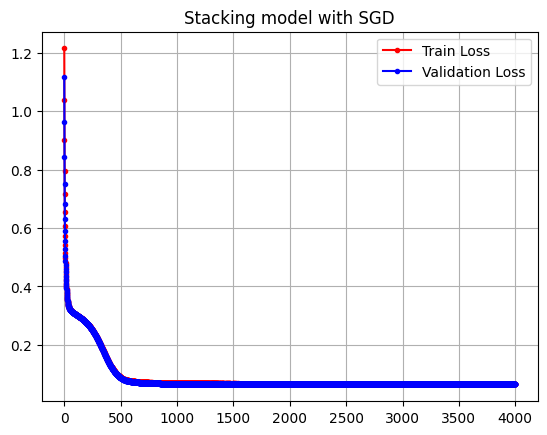

In [9]:
plt.plot(run_hist_1.history["loss"], 'r', marker='.', label="Train Loss")
plt.plot(run_hist_1.history["val_loss"], 'b', marker='.', label="Validation Loss")
plt.title("Stacking model with SGD")
plt.legend()
plt.grid()

In [10]:
score = stacking_model.evaluate(predictions_test, y_full_test)
print('Model Loss: ', score[0])
print('Model accuracy: ', score[1])

125/125 [==============================] - 1s 6ms/step - loss: 0.0645 - accuracy: 0.8775
Model Loss:  0.06450967490673065
Model accuracy:  0.8774999976158142


In [11]:
keras.models.save_model(stacking_model , 'stacking_model.h5')